# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

##### Which variables are significant in predicting the demand for shared bikes.
###### Q1.How well those variables describe the bike demands
###### Q2.Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Importing Libraries.

In [19]:
#Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Step 2: Importing dataset and understanding data from each columns.

In [20]:
bikesharing_df = pd.read_csv('day.csv')
bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
bikesharing_df.shape

(730, 16)

In [22]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [23]:
bikesharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [24]:
# Check the columns
bikesharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [25]:
# check the size of data
bikesharing_df.size

11680

In [26]:
# check the datatypes
bikesharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [27]:
# check the axes of the data
bikesharing_df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [28]:
# check the dimension of the data
bikesharing_df.ndim

2

In [29]:
# check the values of the data
bikesharing_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

This DataSet contains 730 Rows and 16 Columns and there are no null values in any columns.

## Step 3: Cleaning of the data from the dataset

###### 3.1 Droping the columns that are not usefull
 - instant : Is a row instance identifier.
 - dteday  : we cannot consider day to day trend in demand for bikes and also we have some features like weekday, mnth and year etc.
 - casual and registered variables are not available at the time  of prediction and also these describe the target variable cnt in a very trial way i.e
   - target = casual + registered (which leads to data leakage)

In [30]:
# by dropping dteday, we can consider days_old variable (~how old is the business)
bikesharing_df['days_old'] = (pd.to_datetime(bikesharing_df['dteday'],format='%d-%m-%Y') - pd.to_datetime('01-01-2018',format='%d-%m-%Y')).dt.days

In [31]:
bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [32]:
# Dropping columns
bikesharing_df.drop(['instant'],axis=1,inplace=True)
bikesharing_df.drop(['dteday'],axis=1,inplace=True)
bikesharing_df.drop(['casual'],axis=1,inplace=True)
bikesharing_df.drop(['registered'],axis=1,inplace=True) 

In [36]:
bikesharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [42]:
# Inspectiing the columns and data after dropping some columns.
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [39]:
bikesharing_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [40]:
bikesharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [41]:
bikesharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


 - We can see that columns like season, month, weekday and weathersit are integers although they should be non-numerical categories.

### 3.2 Handling Missing values.

In [44]:
bikesharing_df.isnull().sum() # There are no null values.

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

### 3.3 Handling Outliers

In [45]:
bikesharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [47]:
# Unique values in all columns
bikesharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

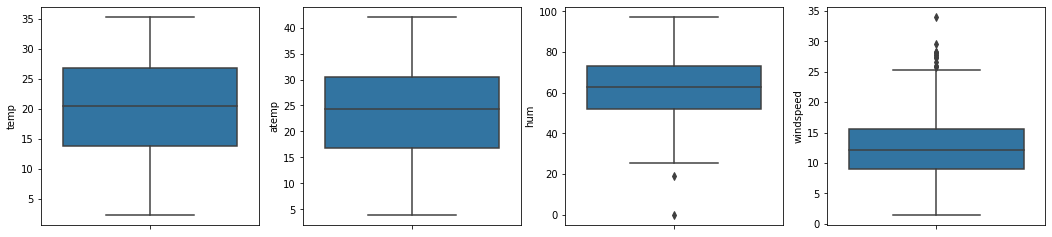

In [55]:
# Drawing box plots for independent variables with continuous values/
columns = ['temp','atemp','hum','windspeed']
plt.figure(figsize=(18,4))
i=1
for column in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=column,data=bikesharing_df)
    i+=1

In [56]:
# There are no outlier present in dataset.

## 4. Exploratory Data Analysis (EDA)

###### 4.1 Convert season and weathersit to categorical types.

In [58]:
bikesharing_df.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
bikesharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace=True)

bikesharing_df.mnth.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace=True)
bikesharing_df.weekday = bikesharing_df.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'fri',5:'sat'})
bikesharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,fri,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,sat,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


##### 4.2 Draw pair plots to check th linear relationship

<Figure size 1080x2160 with 0 Axes>

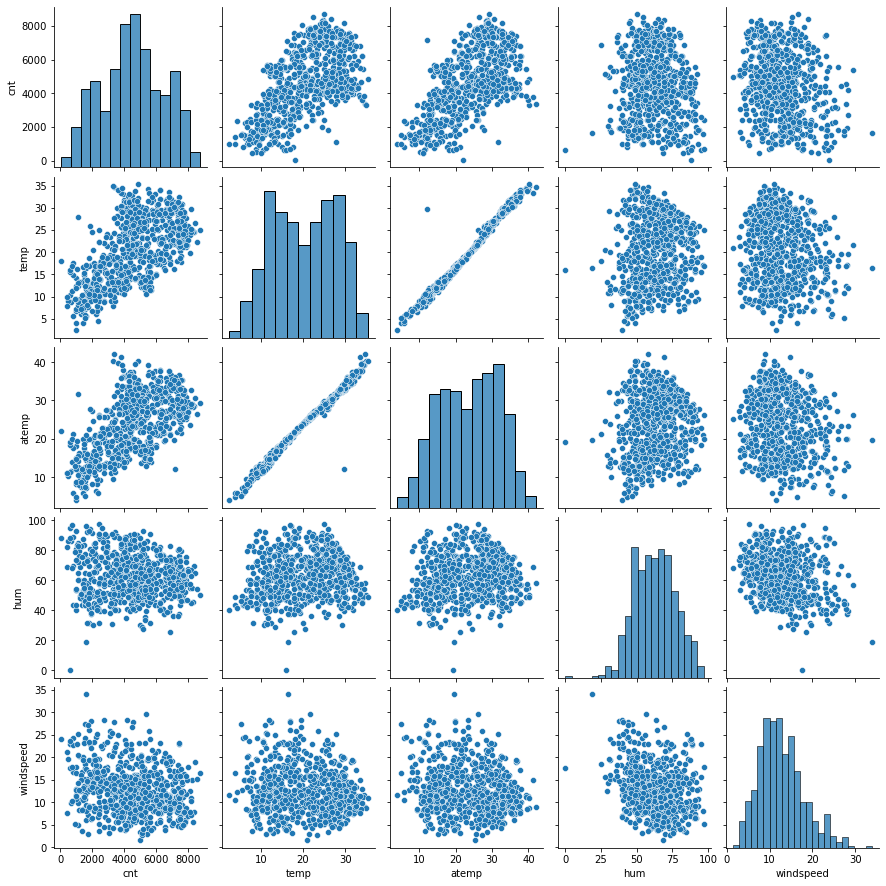

In [60]:
# Pair plot for continuous numeric variable using seaborn
plt.figure(figsize=(15,30))
sns.pairplot(data=bikesharing_df, vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

#### Inference:
 - Looks like the temp and atemp has the highest corelation with the target variable cnt.
 - temp and atemp are highly co-related with each other.  

##### 4.3 Visualising the data to find the correlation between the Numerical variable.

<Figure size 1440x1080 with 0 Axes>

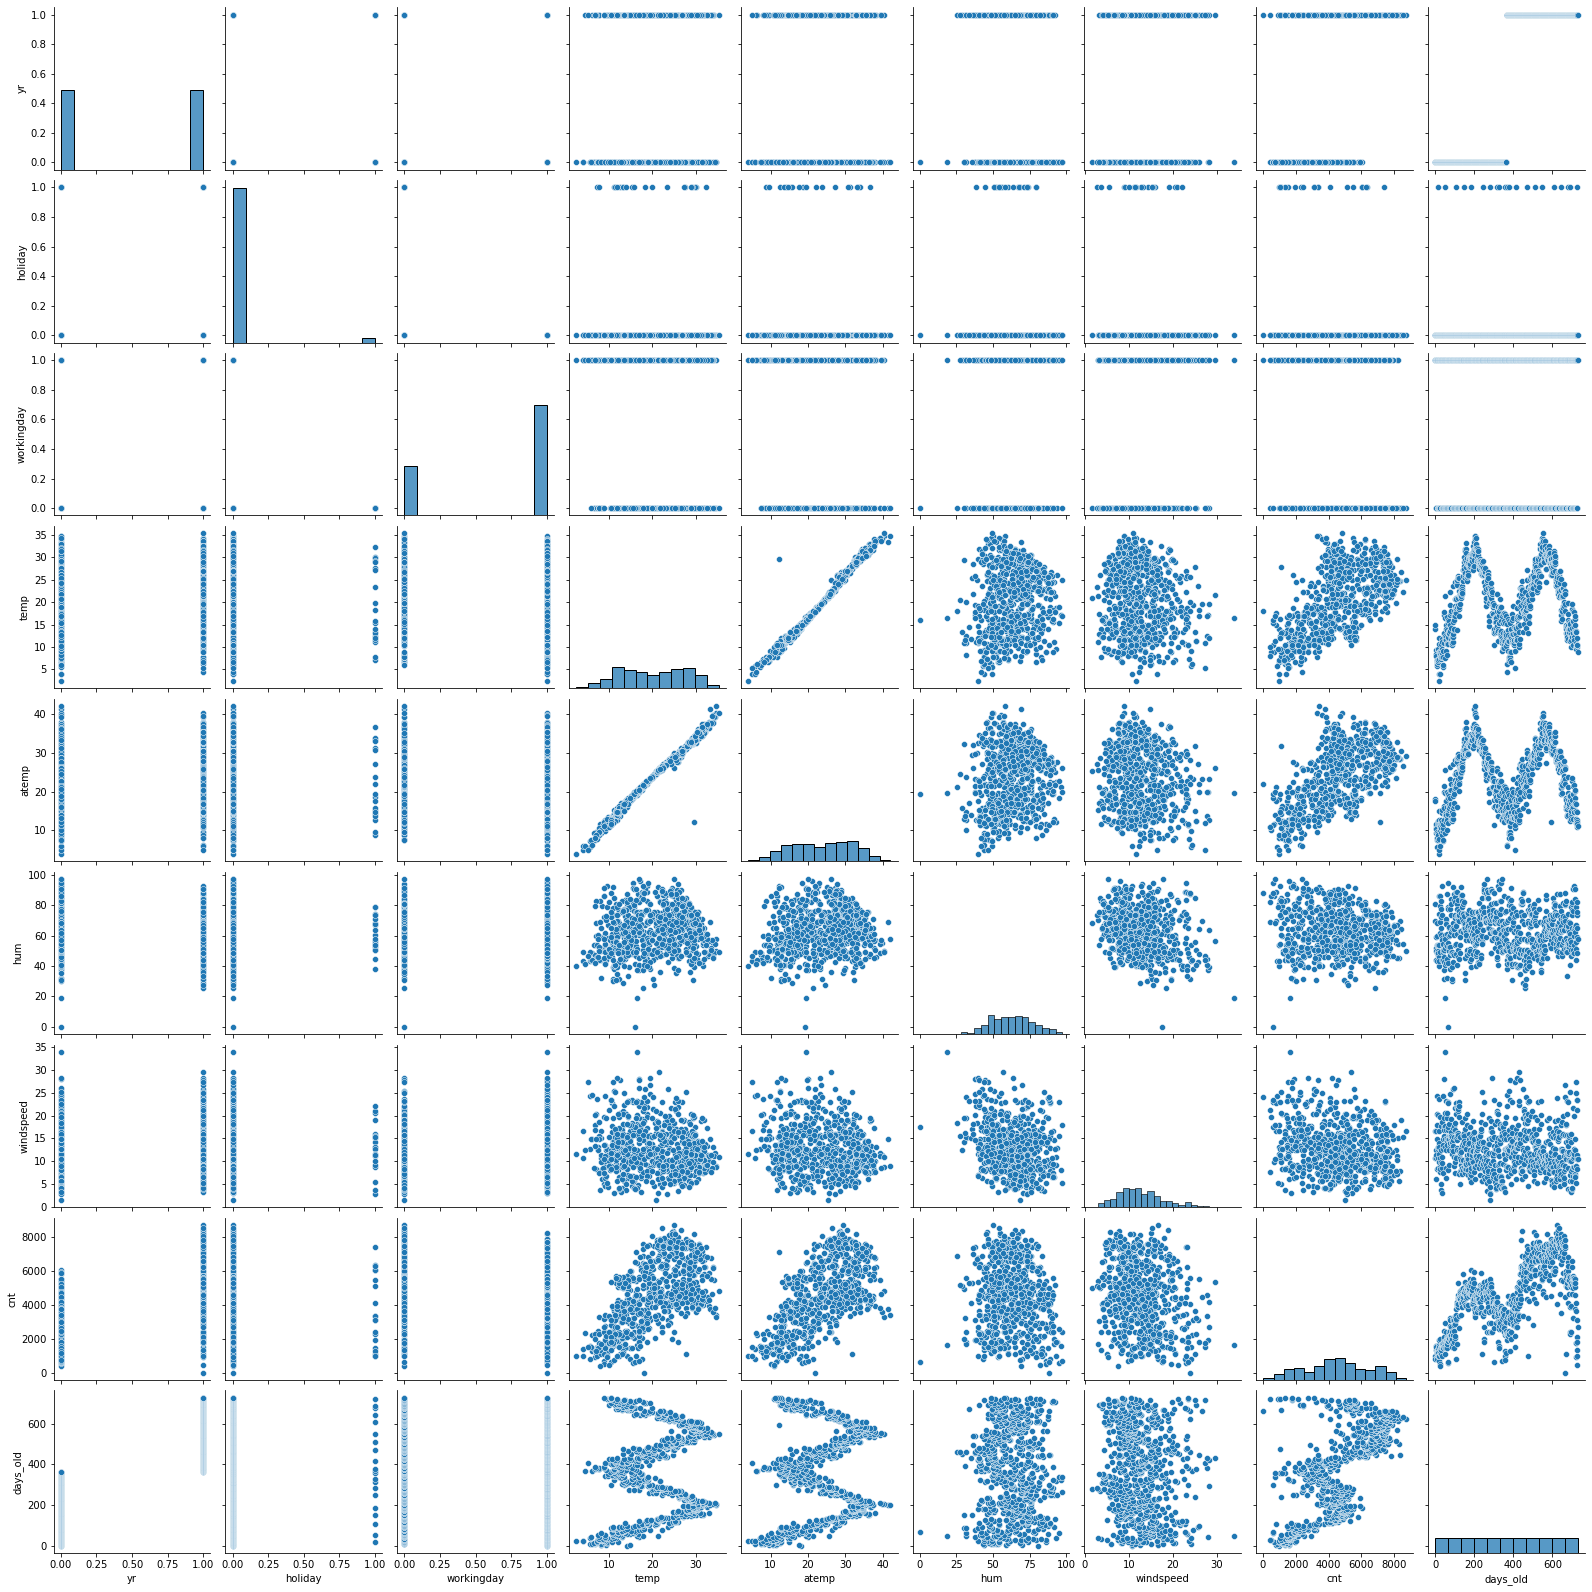

In [61]:
plt.figure(figsize=(20,15))
sns.pairplot(bikesharing_df)
plt.show()

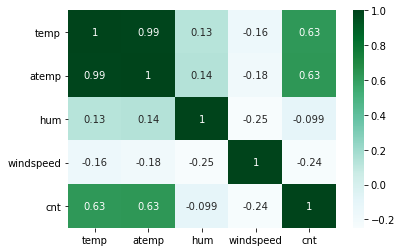

In [62]:
# Checking continuous variable relationshipwith each other
sns.heatmap(bikesharing_df[['temp','atemp','hum','windspeed','cnt']].corr(),cmap='BuGn', annot=True)
plt.show()

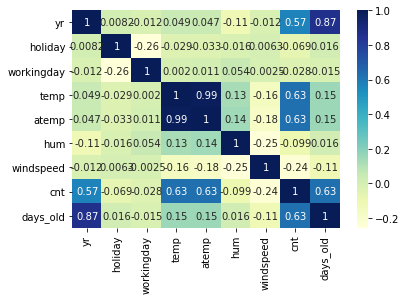

In [64]:
# temp and atemp has correlation more than .99 means almost 1(highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

# Corelation for numeric variables.
cor=bikesharing_df.corr()
sns.heatmap(cor,cmap='YlGnBu',annot=True)
plt.show()

#### 4.4 Drawing heatmap of correlation between variables

<AxesSubplot:>

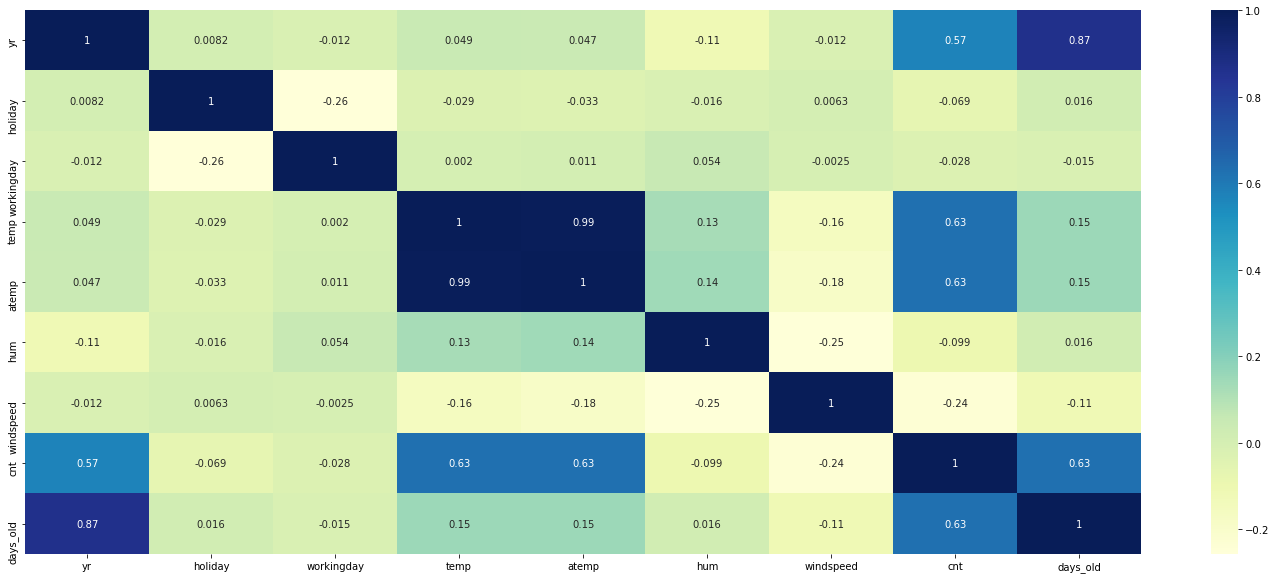

In [67]:
# Calculate Correlation
corr = bikesharing_df.corr()
plt.figure(figsize=(25,10))

# Draw heatmap of correlation
sns.heatmap(corr, annot=True,cmap='YlGnBu')

The columns like map, temp, atmep and day_old seems to be highly correlated. These variables can be considered for the model building.

Also target variables has a linear relationship with some of the independent variable.

#### 4.5 Analysing Catagorical variables with target variables.

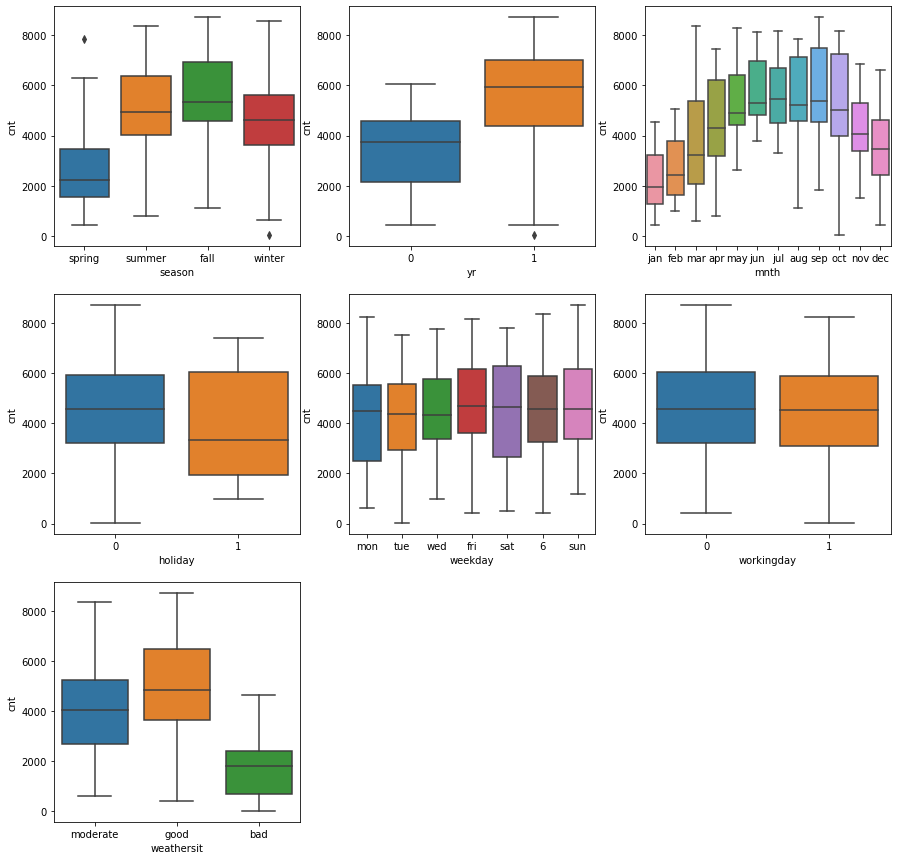

In [69]:
# Box plot for catagorical variables with target variables
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15,15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikesharing_df, x=i[1], y='cnt')
plt.show()

- From above plots we can say that:
    - Season(3) : fall has highest demand for rental bikes
    - Demand was continuous grown for next year, which continuous till june.
    - September has highest demand after that demand decreased.
    - During holidays, demand decreases. Weekdays are not sufficient to analyst demand.
    - During the clear weathersit has highest demand.
    - During september, bike sharing were more.

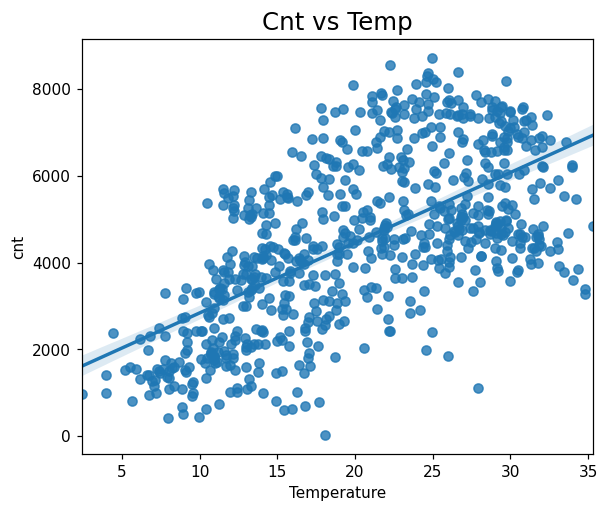

In [70]:
plt.figure(figsize=(6,5), dpi=110)
plt.title('Cnt vs Temp', fontsize=16)
sns.regplot(data = bikesharing_df, y='cnt', x='temp')
plt.xlabel('Temperature')
plt.show()

## Demand for bikes were positively correlated to temperature.
## cnt and temp indicating linear relation together.

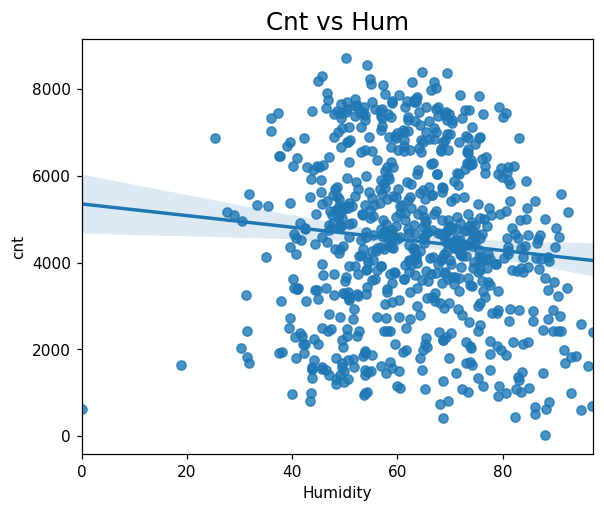

In [71]:
plt.figure(figsize=(6,5), dpi=110)
plt.title('Cnt vs Hum', fontsize=16)
sns.regplot(data = bikesharing_df, y='cnt', x='hum')
plt.xlabel('Humidity')
plt.show()

## Value around humidity is more scattered, although cnt decreasing with increase with humidity.

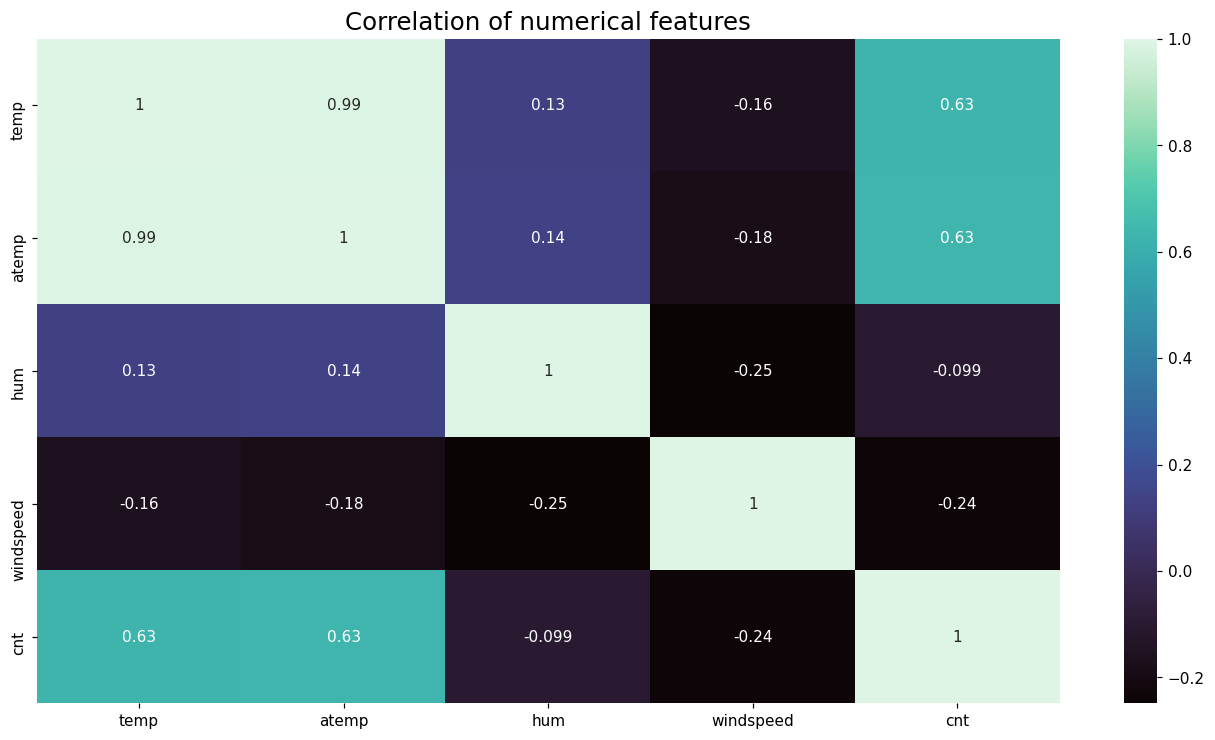

In [74]:
numerical_features = ['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize=(15,8), dpi=110)
plt.title('Correlation of numerical features', fontsize=16)
sns.heatmap(data = bikesharing_df[numerical_features].corr(), annot=True, cmap='mako')
plt.show()

## temp & atemp are highly correlated with cnt. 

In [75]:
bikesharing_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


# 5. Data Preparation for Linear Regression.

### 5.1 Creating dummy variables for all categorical variables.

In [77]:
bikesharing_df =  pd.get_dummies(data=bikesharing_df, columns=['season','mnth','weekday'], drop_first=True)
bikesharing_df =  pd.get_dummies(data=bikesharing_df, columns=['weathersit']) 

In [80]:
bikesharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_fri', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [81]:
bikesharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,1,0,0,0,0,1,0


# 6. Model Building

### 6.1 Split data into training and test

In [82]:
# Shape
bikesharing_df.shape

(730, 32)

In [85]:
# For target variables we have y.
y = bikesharing_df.pop('cnt')
# Independent variable.
X = bikesharing_df
# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,1,0,0,0,0,1,0


In [88]:
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


### 6.2 Feature Scaling continuous variable 


To make all features in the same scale to interpt easily.
These columns are columns to be scaled temp,hum,windspeed.

In [93]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [96]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']
# Nomalized scaler to scaler
scaler = MinMaxScaler()
# Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [97]:
# Inspecting stats from training set only
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.135029,0.148728,0.150685,0.133072,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.342090,0.356169,0.358092,0.339986,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,1,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,1,0,0,0,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,1,0,0,0,0,0,0,0,1


### 6.3 Build a Model using RFE and Automated approach

Use RFE to eliminate some columns

In [101]:
# Linear Regression model using SKLearn for RFE 
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [102]:
# Using Automated approach, cut down the numbers of features to 15.
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [104]:
# Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_jul', False, 12),
 ('mnth_jun', False, 5),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sep', True, 1),
 ('weekday_fri', False, 16),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 17),
 ('weekday_sun', False, 14),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

### 6.4 Manual Elimination

Function to build a model using statsmodel api

In [105]:
# Taking columns selected for model as parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train,X_train_sm).fit()
    print(lm.summary())
    return lm

Function to calculate VIFs and print them

In [115]:
# Taking columns selected for VIFs as parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [116]:
# Columns for RFE. for manual elimination for columns.
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sep', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [117]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov', 'weekday_fri',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

# Step 7. Building Models

In [118]:
### 7.1 Model 1 - Start with all variables selected by RFE.
cols = ['yr','holiday','workingday','temp','hum','windspeed','season_spring','season_summer','season_winter','mnth_jan','mnth_jul','weekday_sat','weathersit_bad','weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          1.81e-178
Time:                        07:52:28   Log-Likelihood:                -4144.8
No. Observations:                 511   AIC:                             8320.
Df Residuals:                     496   BIC:                             8383.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2884.3810    

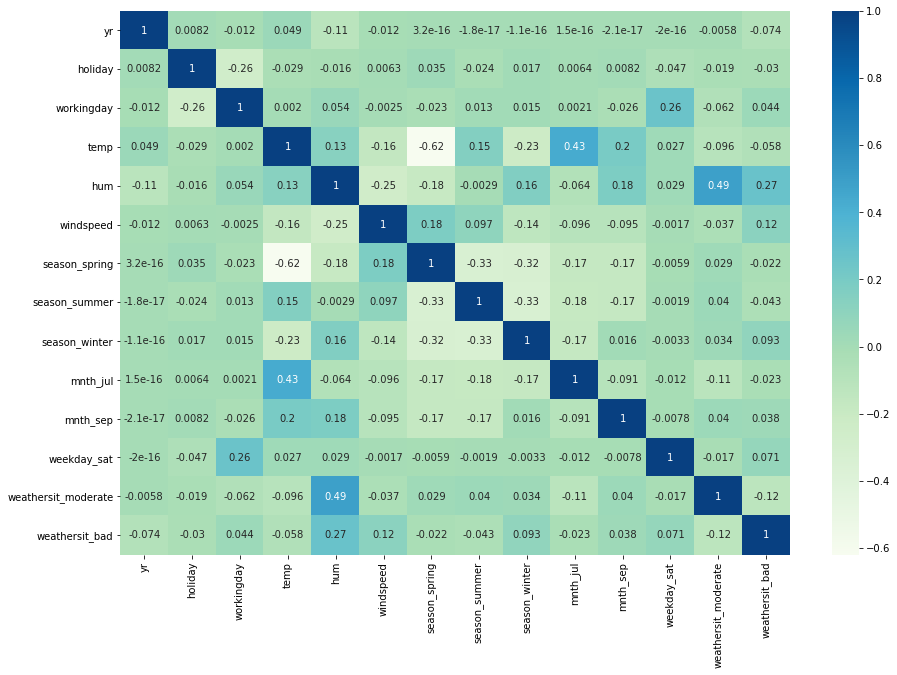

In [119]:
# Checking correlation of features selected by RFE with target column
plt.figure(figsize=(15,10))
sns.heatmap(bikesharing_df[['yr','holiday','workingday','temp','hum','windspeed','season_spring','season_summer','season_winter','mnth_jul','mnth_sep','weekday_sat','weathersit_moderate','weathersit_bad']].corr(), cmap='GnBu',annot=True)
plt.show()

## Model 2

In [120]:
# The variable mnth_jan has high P-value insignificantly and it has negative coefficient. We can drop it.
cols = ['yr','holiday','workingday','temp','hum','windspeed','season_spring','season_summer','season_winter','mnth_jul','mnth_sep','weekday_sat','weathersit_moderate','weathersit_bad']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.9
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          4.90e-183
Time:                        12:44:02   Log-Likelihood:                -4133.9
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     496   BIC:                             8361.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2724.5504    

## Model 3

### All the columns have p-value >.05 so checking VIFs

In [123]:
# The variable hum has high P-value insignificantly and it has negative coefficient. We can drop it.
cols = ['yr','holiday','workingday','temp','windspeed','season_spring','season_summer','season_winter','mnth_jul','mnth_sep','weekday_sat','weathersit_moderate','weathersit_bad']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.9
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          8.22e-181
Time:                        12:50:56   Log-Likelihood:                -4141.9
No. Observations:                 511   AIC:                             8312.
Df Residuals:                     497   BIC:                             8371.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1964.6562    

## Model 4

In [125]:
# The variable holiday has high P-value insignificantly and it has negative coefficient. We can drop it.
cols = ['yr','workingday','temp','windspeed','season_spring','season_summer','season_winter','mnth_jul','mnth_sep','weekday_sat','weathersit_moderate','weathersit_bad']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.0
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          5.85e-179
Time:                        12:52:19   Log-Likelihood:                -4149.1
No. Observations:                 511   AIC:                             8324.
Df Residuals:                     498   BIC:                             8379.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1873.1156    

## Model 5

In [126]:
# The variable mnth_jul has high P-value insignificantly and it has negative coefficient. We can drop it.
cols = ['yr','workingday','temp','windspeed','season_spring','season_summer','season_winter','mnth_sep','weekday_sat','weathersit_moderate','weathersit_bad']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          2.86e-179
Time:                        12:53:28   Log-Likelihood:                -4151.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     499   BIC:                             8377.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1810.3411    

## Model 6

In [127]:
# The variable temp has high P-value insignificantly and it has negative coefficient. We can drop it.
cols = ['yr','workingday','windspeed','season_spring','season_summer','season_winter','mnth_sep','weekday_sat','weathersit_moderate','weathersit_bad']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     157.1
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          2.68e-147
Time:                        12:55:06   Log-Likelihood:                -4229.5
No. Observations:                 511   AIC:                             8481.
Df Residuals:                     500   BIC:                             8528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5140.8311    

## Model 7

In [128]:
# The variable July replacing spring as both were highly correlated.
cols = ['yr','workingday','windspeed','mnth_jul','season_summer','season_winter','mnth_sep','weekday_sat','weathersit_bad','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     75.33
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           3.79e-93
Time:                        12:58:32   Log-Likelihood:                -4357.9
No. Observations:                 511   AIC:                             8738.
Df Residuals:                     500   BIC:                             8784.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3513.7147    

## Model 8

In [129]:
# The variable July replacing spring as both were highly correlated.
cols = ['yr','workingday','windspeed','mnth_jul','season_summer','season_winter','mnth_sep','weekday_sat','weathersit_bad','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     75.33
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           3.79e-93
Time:                        12:59:50   Log-Likelihood:                -4357.9
No. Observations:                 511   AIC:                             8738.
Df Residuals:                     500   BIC:                             8784.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3513.7147    

In [130]:
# The variable windspeed replacing spring as windspeed was highly correlated with temp.
cols = ['yr','workingday','season_spring','mnth_jul','season_summer','season_winter','mnth_sep','weekday_sat','weathersit_bad','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.7
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          8.47e-143
Time:                        13:02:04   Log-Likelihood:                -4240.1
No. Observations:                 511   AIC:                             8502.
Df Residuals:                     500   BIC:                             8549.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4695.1002    

## Model 10

In [131]:
# Using the weekend "Sunday" was dropped during RFE instead of saturday.
cols = ['yr','workingday','season_spring','mnth_jul','season_summer','season_winter','mnth_sep','weekday_sat','weathersit_bad','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.7
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          8.47e-143
Time:                        13:04:43   Log-Likelihood:                -4240.1
No. Observations:                 511   AIC:                             8502.
Df Residuals:                     500   BIC:                             8549.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4695.1002    

## Model 11

In [133]:
# Removing 'season_summer' and 'workingday' and adding temp.
cols = ['yr','season_spring','mnth_jul','season_winter','mnth_sep','weekday_sun','weathersit_bad','weathersit_moderate','temp']
# ['yr','holiday','temp','spring','winter','july','september','Sunday','Light_Snow_Rain','Mist_Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          9.73e-178
Time:                        13:09:58   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

##### -Inference-

p-value for all features is almost 0.0 and R2 is 0.821, here VIF seems to be most accepted. Let us select Model 11 as our final as it has all statistic with high R-Squared value and Adjusted R-Squaredd and F-statistic, along with significance variables and no multi colinear variables with high VIF.

Difference between R-squared and Adjusted R-squared values for this model is veryless.

There are no additional parameters that can removed from this model.

In [135]:
# Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1=LinearRegression()
    lr1.fit(X,y)
    return lr1

In [137]:
# Building the finalmodel using sklearn
cols = ['yr','season_spring','mnth_jul','season_winter','mnth_sep','weekday_sun','weathersit_bad','weathersit_moderate','temp']

# Building a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1740.7372440164318 [ 1994.67955569 -1167.70089558  -514.63181313   496.75430396
   465.92729708   190.37518346 -2256.10482681  -662.38986442
  3984.25555511]


# Step 8 : Model Evalution

### 8.1 Residual Analysis.

In [139]:
y_train_pred = lr.predict(X_train[cols])

In [140]:
# Histogram of error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel("Errors")

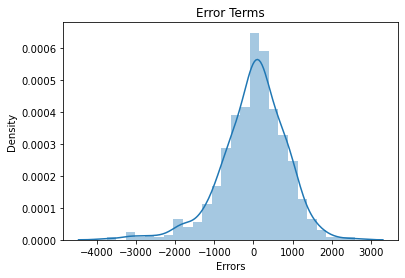

In [141]:
plot_res_dist(y_train, y_train_pred)

- Errors are normally distributed with 0 mean.

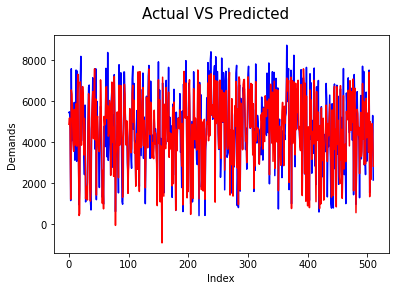

In [143]:
# Actual VS Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train,color='blue')
plt.plot(c,y_train_pred,color='red')
plt.suptitle('Actual VS Predicted', fontsize=15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

- Actual and Predicted result following almost the same pattern.

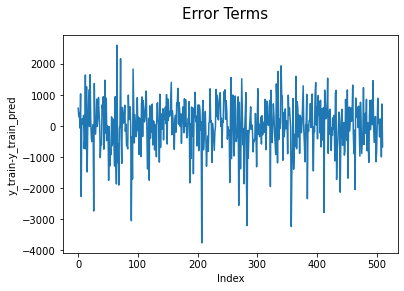

In [145]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle("Error Terms",fontsize=15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

- Error terms are Independent of each other.

In [146]:
# R-squared value
r2_score(y_train,y_train_pred)

0.8158045196281631

##### -Inference-

- R2 same as we obtained for our final model

### 8.2 : Linearity Check

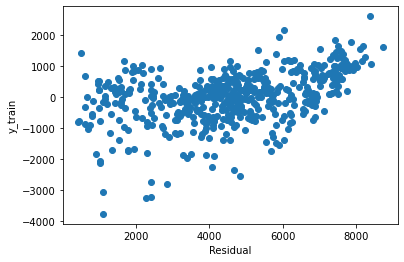

In [147]:
# Scatter plot 
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel('y_train')
plt.xlabel('Residual')
plt.show()

### 8.3 : Predict values for test data set

In [148]:
# Scalar variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']
# Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [149]:
# Columns from final model
cols = ['yr','season_spring','mnth_jul','season_winter','mnth_sep','weekday_sun','weathersit_bad','weathersit_moderate','temp']
# Predicting value for test data
y_test_pred = lr.predict(X_test[cols])

### 8.4 : R-Squared value for test predictions

In [150]:
# Find out the R squared value between test and predicted test data sets.
r2_score(y_test,y_test_pred)

0.812722870299522

Inference

- R2 value for predictions on test data(0.815) is almost same as R2 value of train data(0.818). This is a great R squared value. Model is performing good even on unseen data(test data).

### 8.5 : Homoscedacity

Text(0, 0.5, 'y_test_pred')

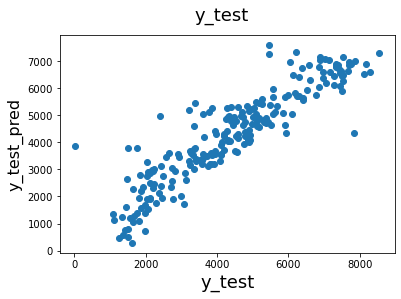

In [151]:
# Plotting y_test and y_test_pred to understanding the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test', fontsize=18)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

  Inference

 - Variance of the residual(error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

### 8.8 : Plot Test vs Predicted test values

In [155]:
# Function to plot Actual vs Predicted
# Takes Actual and Predicted values as input along with the scale and title to indicate data.
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color='blue', linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color='red', linewidth=2.5, linestyle="-")
    fig.suptitle("Actual and Predicted -"+dataname, fontsize=20)
    plt.xlabel('Index',fontsize=18)
    plt.ylabel('Counts',fontsize=16)

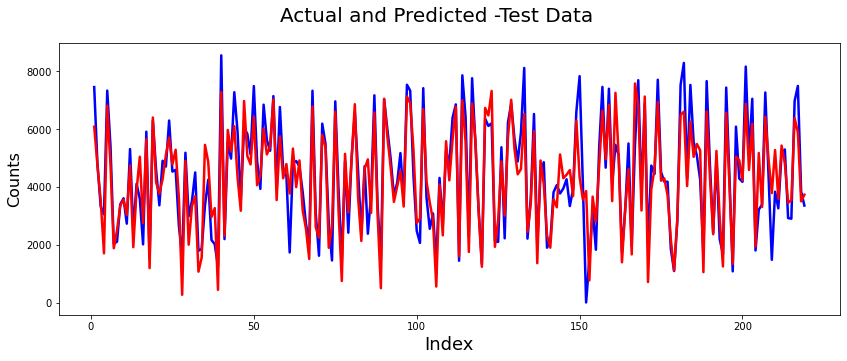

In [156]:
plot_act_pred(y_test,y_test_pred,len(y_test)+1, 'Test Data')

 Inference

 - Predictions for test data is very close to actuals.

### 8.9 : Error Terms for Test Data

In [161]:
# Error Terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c, act-pred, color='blue', marker='o', linewidth=2.5, linestyle=" ")
    fig.suptitle('Error Terms',fontsize=20)
    plt.xlabel("Index", fontsize=18)
    plt.ylabel("COunts - Predicted Counts", fontsize=16)

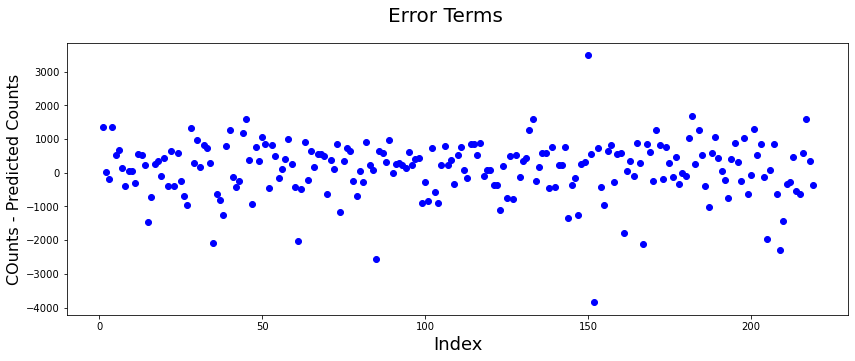

In [162]:
plot_err_terms(y_test,y_test_pred)

Inference

 - Error are randomely distributed and there are no pattern. Which means the output is explained well  by the model and there are no other parameters that can explain the model later.

# Step 9 : Making Predictions.

In [163]:
# Checking data before scaling
bikesharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,1,0,0,0,0,1,0


### 9.1 : Interpretting the Model

 - Lets go with the interpretting the RFE with manual model results as importance to imputation.

In [164]:
# Rebuilding final model of manual + RFE approach using statsmodel to interpret this.
cols = ['yr','season_spring','mnth_jul','season_winter','mnth_sep','weekday_sun','weathersit_bad','weathersit_moderate','temp']


lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          9.73e-178
Time:                        14:55:15   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

### Interepretation of results:

###### Key Points to the feature, the company should focus on. 

 - During light snow or rain there are less bookings. They have to cover-up these loss in active months.
 - It is expected to have crashing (Increase) in number of users ones the situation of the pandemic over, as compare to 2018 data.
 - The company should expand the business during Spring season.
 - The company should expand business during the month of September.
 - After Covid 19-pandemic, the company should be more focused towards new offers during spring season when the eeather is pleasant.
 - Also, the business can be more actively in benefit, if there will be more advertisement in the market. 



###### These variables are most useful in predictions of demand for shared bikes to enhence and analyse the business insights.

 - holiday
 - temp (temperature)
 - hum (humidity)
 - windspeed (speed of wind)
 - season (different types of seasons)
 - months (Mostly - Jan, Jul,  Sep, Nov, Dec)
 - Year (2019)
 - weekday (Mainly - Sunday)
 - weathersit (Majourly - Light snow + Cloudy)